## Задание 5.1. Начальное положение треугольника Рело и квадрата

In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo

In [47]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

In [48]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, n=n)

Матрица square для покоординатного описания границы квадрата:

In [49]:
half = r / 2

square = np.array([
    [-half, -half],  
    [ half, -half], 
    [ half,  half],  
    [-half,  half],  
    [-half, -half]   
])

In [50]:
square_points = []
for i in range(4): 
    start = square[i]
    end = square[i+1]
    
    x_points = np.linspace(start[0], end[0], N)
    y_points = np.linspace(start[1], end[1], N)
    
    square_points.extend(np.column_stack((x_points, y_points)))

smooth_square = np.array(square_points)


(np.float64(-5.538675134594813),
 np.float64(6.312177826491073),
 np.float64(-5.5),
 np.float64(5.500000000000001))

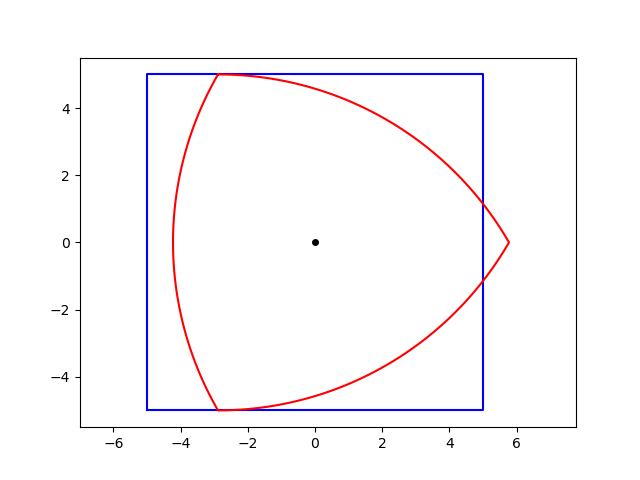

In [51]:
plt.plot(square[:,0],square[:,1], 'b-')
plt.plot(relo_matrix[:,0], relo_matrix[:,1], 'r-')
plt.plot(center[0], center[1], 'k.', markersize=8)
plt.axis('equal')

Пояснение за shift: 
$$
\mathbf{shift} = R - \frac{r}{2} = r \cdot \left( \frac{1}{\sqrt{3}} - \frac{1}{2} \right)
$$

где:
- $R = \dfrac{r}{\sqrt{3}}$ — радиус описанной окружности около тругольника рело
- $r$ — ширина треугольника Рёло (равна стороне квадрата)

Если центр треугольника Рело совместить с центром квадрата, его вершины будут находиться на расстоянии R = r/√3 от центра.Половина стороны квадрата равна r/2 (поскольку квадрат имеет сторону r). Разница между R и r/2 определяет, насколько треугольник выступает за границы квадрата.

In [52]:
shift = [r * (1/np.sqrt(3) - 0.5), 0]   # сдвиг по оси X
relo_matrix_shifted = relo_matrix - shift
center -= shift
print(shift)

[np.float64(0.7735026918962584), 0]


Изобразить  в одной графической области квадрат, треугольник Рело после сдвига и точку центра треугольника Рело после сдвига.


In [53]:
plt.plot(square[:,0],square[:,1], 'b-')
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-')
plt.plot(center[0], center[1], 'k.', markersize=8)
plt.axis('equal')

(np.float64(-5.538675134594813),
 np.float64(6.312177826491073),
 np.float64(-5.5),
 np.float64(5.500000000000001))

## Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

In [54]:
N_frames = 100


In [55]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

In [56]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(np.float64(-5.5),
 np.float64(5.500000000000002),
 np.float64(-5.5),
 np.float64(5.500000000000001))

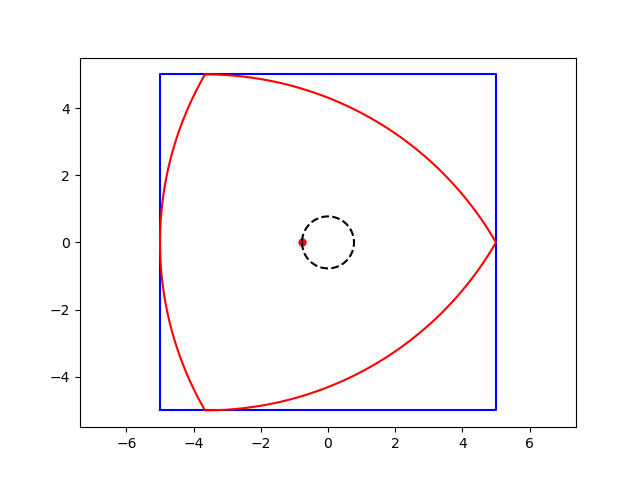

In [57]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

Напишите пользовательскую функцию трех аргументов `draw_frame(r, N_frames, frame)`, которая изображает кадр с номером `frame` при поступательном движении центра треугольника Рело по окружности против часовой стрелки.

- Аргумент r задает ширину треугольника Рело.
- Аргумент N_frames задает количество кадров для прохождения центром треугольника Рело полной окружности.
- Аргумент frame задает номер кадра; по умолчанию `frame=0`.
- Функция осуществляет визуализацию и не возвращает объекты. Для функции `draw_frame` укажите аннотации типов и оформите строки документации.

In [58]:
def draw_frame(r, N_frames, frame=0):
    """
    Отрисовывает кадр  номера `frame` при поступательном движении центра треугольника Рело по окружности против часовой стрелки.

    Параметры:
    - r (int): Ширина треугольника Рело.
    - N_frames (int): Количество кадров анимации.
    - frame (int, по умолчанию 0): Номер кадра анимации .
    
    """

    shift = [r * (1/np.sqrt(3) - 0.5), 0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    
    plt.plot(smooth_square[:,0],smooth_square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

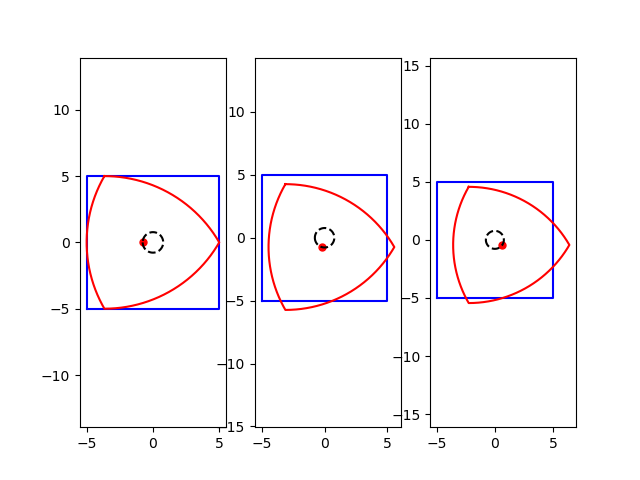

In [59]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)


Реализуйте анимацию поступательного движения треугольника Рело по окружности против часовой стрелки. При построении анимации возьмите за основу функцию `draw_frame`, но не используйте ее напрямую в качестве аргумента функции FuncAnimation (модуль animation библиотеки matplotlib).

In [60]:
import matplotlib.animation as anim
%matplotlib widget
from matplotlib.animation import FuncAnimation

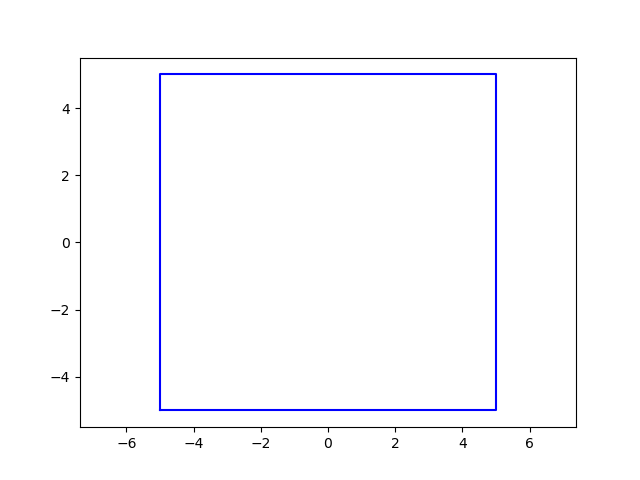

In [61]:
fig1 = plt.figure()
ax1 = plt.axes()
line1, = ax1.plot(square[:,0], square[:,1], 'b-') # для графика функции
line2, = ax1.plot([], [], 'go') # для точки
line3, = ax1.plot([], [], 'r-')

def at_frame(point):
    line2.set_data([point[0]], [point[1]])
    relo_matrix_shifted = relo_matrix + point
    line3.set_data(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1])

def init():
    global line2
    line1, = ax1.plot(square[:,0], square[:,1], 'b-') # графика функции
    line3, = ax1.plot([], [], 'r-')
    line2, = ax1.plot([], [], 'go') # для точки
    line4, = ax1.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    line5, = ax1.plot(center_frame[:,0], center_frame[:,1], 'k--')

plt.axis('equal')

FuncAnimation(fig1, at_frame, frames=center_frame, init_func=init,repeat=False, interval=20)

In [62]:
plt.close('all')

## Задание 5.3. Анимация качения треугольника Рело

In [63]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [64]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

(np.float64(-6.3508529610858835),
 np.float64(6.350852961085886),
 np.float64(-5.500000000000004),
 np.float64(5.500000000000001))

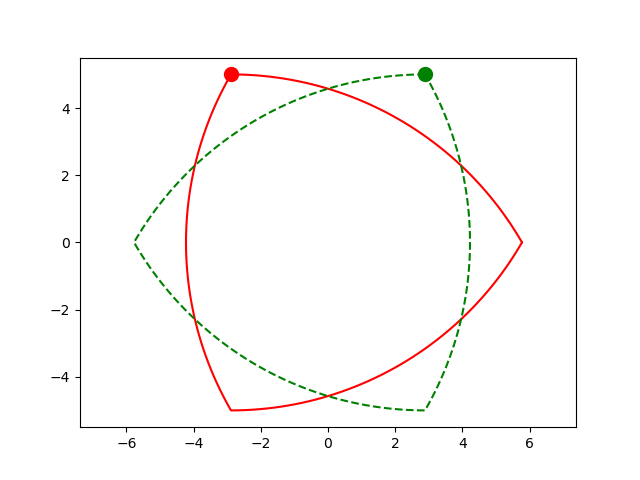

In [65]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [66]:
theta = np.linspace(0, 2*np.pi/3, N_frames)


(np.float64(-5.501735269668723),
 np.float64(5.536440663043177),
 np.float64(-5.5002878716042405),
 np.float64(5.506045303689057))

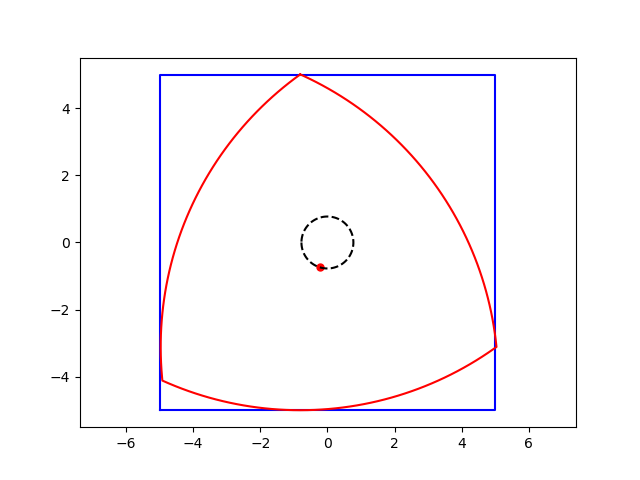

In [67]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

Измените пользовательскую функцию `draw_frame(r, N_frames, frame)`, чтобы создавалось изображение кадра с номером frame для анимации качения треугольника Рело по квадрату.

In [68]:
def draw_frame(r, N_frames, frame=0):
    shift = [r * (1/np.sqrt(3) - 0.5), 0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    theta = np.linspace(0, 2 * np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
                           + center_frame[frame])
    
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    
    plt.axis('equal')

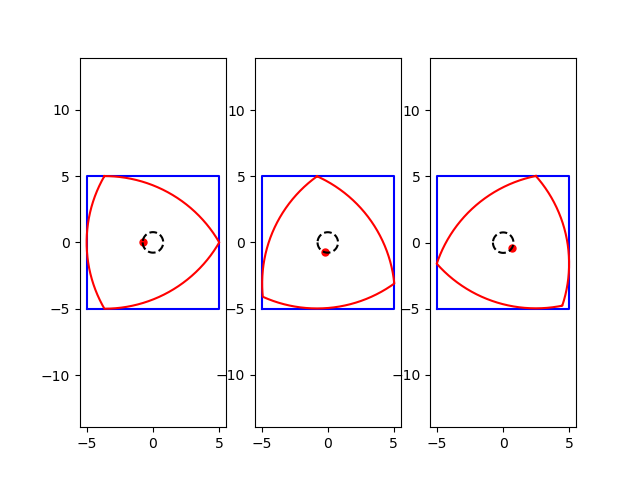

In [69]:
plt.figure()
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

Реализуйте анимацию качения треугольника Рело против часовой стрелки. При построении анимации возьмите за основу функцию `draw_frame`, но не используйте ее напрямую в качестве аргумента функции `FuncAnimation` (модуль animation библиотеки matplotlib).

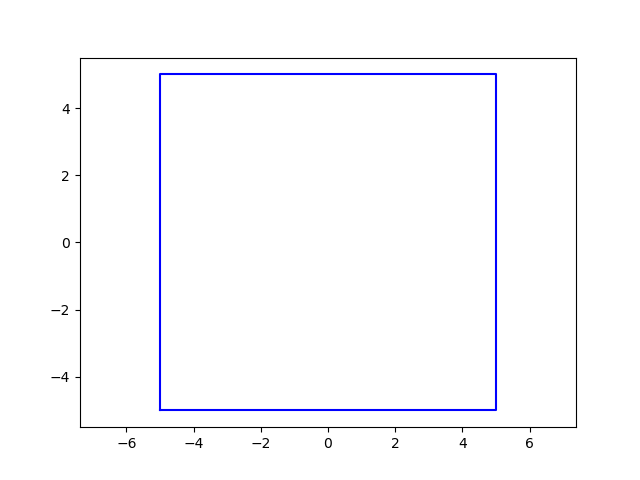

In [70]:
fig2 = plt.figure()
ax2 = plt.axes()
line1, = ax2.plot(square[:,0], square[:,1], 'b-')
line2, = ax2.plot([], [], 'go') 
line3, = ax2.plot([], [], 'r-')

def at_frame2(frame):
    global center_frame
    point = center_frame[frame]
    line2.set_data([point[0]], [point[1]])
    matrix=rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix, row) for row in relo_matrix])
                           + point)
    line3.set_data(relo_matrix_changed[:,0], relo_matrix_changed[:,1])

def init2():
    global line2
    global line3
    line1, = ax2.plot(square[:,0], square[:,1], 'b-')
    line3, = ax2.plot([], [], 'r-')
    line2, = ax2.plot([], [], 'go') 
    line4, = ax2.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    line5, = ax2.plot(center_frame[:,0], center_frame[:,1], 'k--')

plt.axis('equal')

FuncAnimation(fig2, at_frame2, frames=range(N_frames), init_func=init2,repeat=False, interval=20)

In [45]:
plt.close('all')